In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from subprocess import check_output

In [6]:
df = pd.read_csv('./input/rainfall in india 1901-2015.csv')
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


In [8]:
print("Total Number and Names of subdivisions")
subdivs = df['SUBDIVISION'].unique()
number_of_subdivs = subdivs.size
print('Total # of Subdivs: ', str(number_of_subdivs))
subdivs

Total Number and Names of subdivisions
Total # of Subdivs:  36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

Average Annual Rainfall in Each Subdivision
SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
WEST RAJASTHAN                292.673043
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


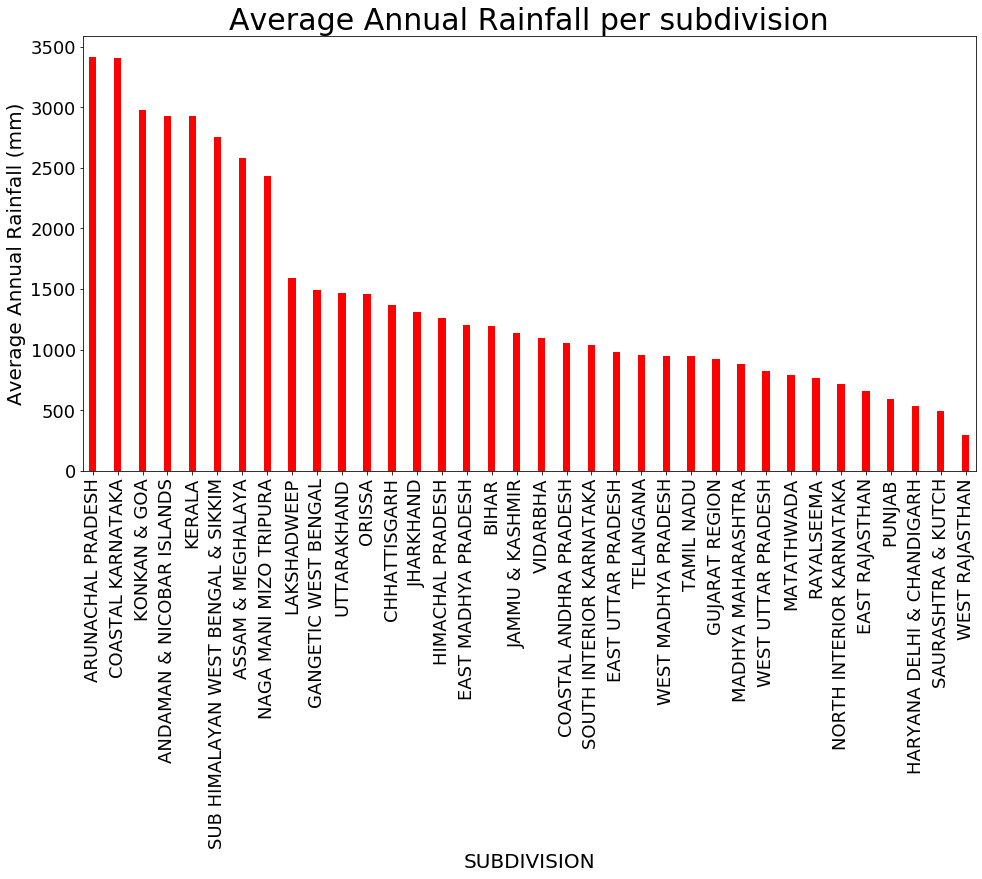

In [13]:
print("Average Annual Rainfall in Each Subdivision")

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r', width=0.3, title='Average Annual Rainfall per subdivision', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,35,35]])

Total Rainfall in Each year
Max :  61815.600000000006  Occured in  [1961]
Min :  41273.6  Occured in  [1972]
Mean :  50182.83826086956


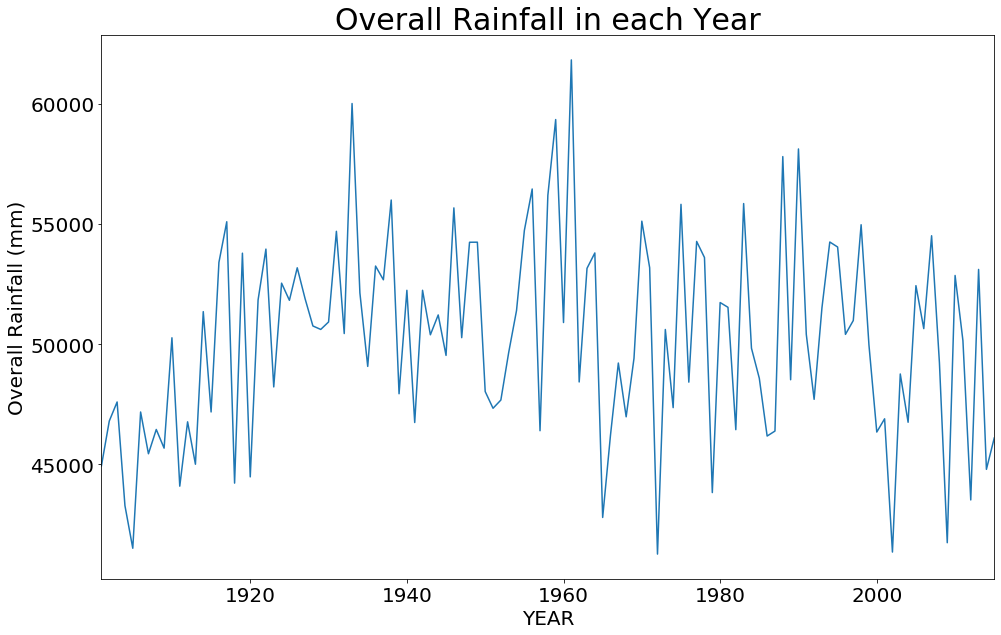

In [15]:
print('Total Rainfall in Each year')

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line', title='Overall Rainfall in each Year', fontsize=20)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max : ', str(dfg.max()), ' Occured in ', str(dfg.loc[dfg == dfg.max()].index.values[0:1]))
print('Min : ', str(dfg.min()), ' Occured in ', str(dfg.loc[dfg == dfg.min()].index.values[0:1]))
print('Mean : ', str(dfg.mean()))

MAD (Training Data: ) [125.15720785  55.06294685 141.35025722 ...   4.2347022   37.21899001
  90.64471877]
MAD (Test Data): 20.594148811353385


/home/jp/duke/advancedpython/advpy/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


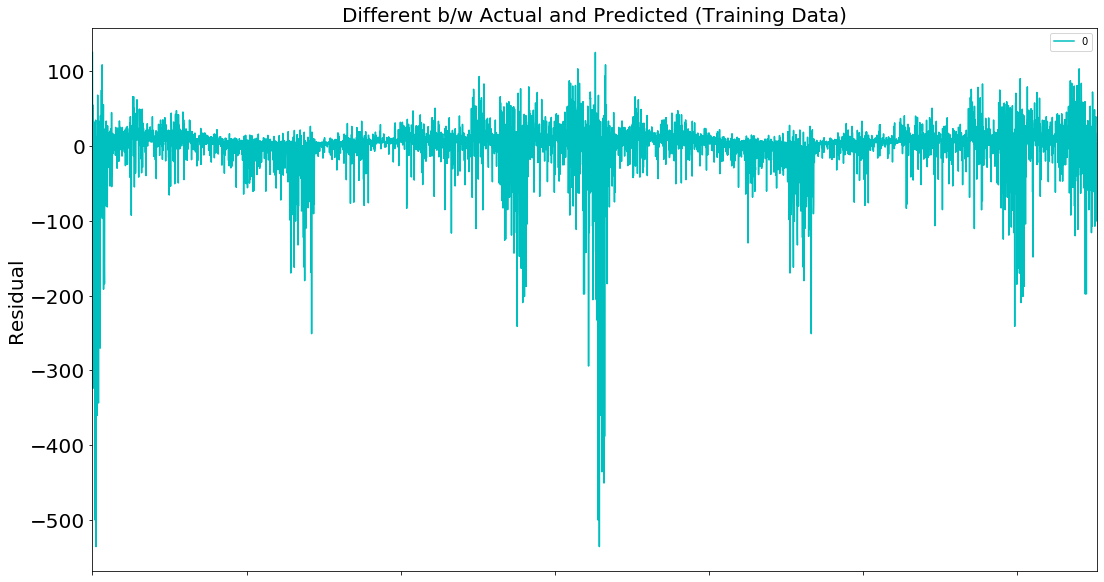

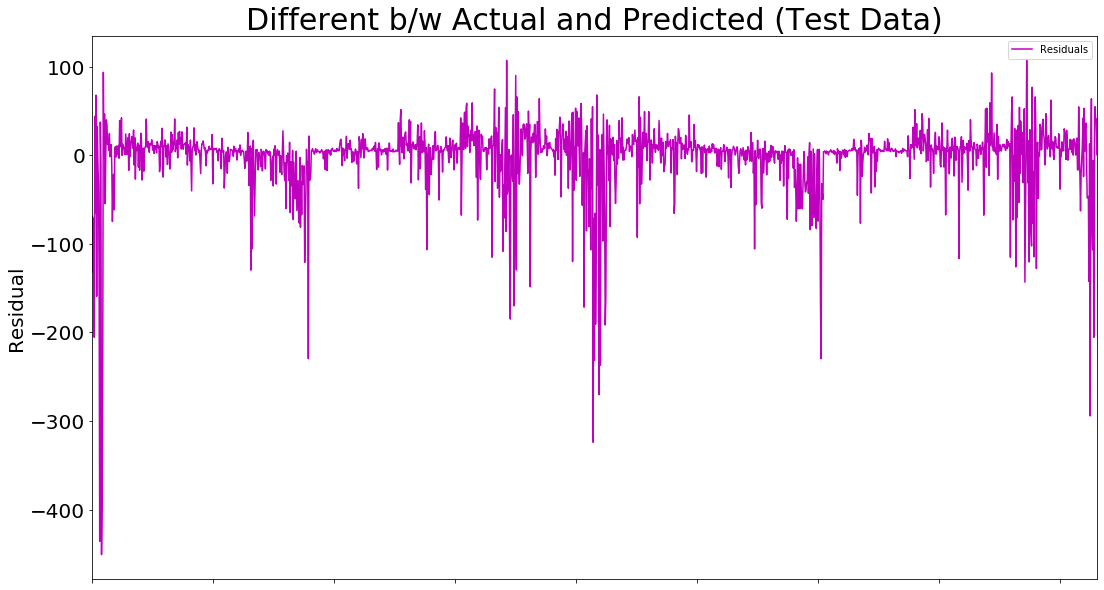

In [31]:
# Prediction using Linear Regression
months = df.columns[2:14]
df2 = df[['SUBDIVISION', months[0], months[1], months[2], months[3]]]
df2.columns = np.array(['SUBDIVISION', 'x1', 'x2', 'x3', 'x4'])

for k in range(1, 9):
    df3 = df[['SUBDIVISION', months[k], months[k+1], months[k+2], months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1', 'x2', 'x3', 'x4'])
    df2 = df3.append(df3)
    
df2.index = range(df2.shape[0])

df2.drop('SUBDIVISION', axis=1, inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4', axis=1), df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4', axis=1))
residuals = predicted_values - df_train['x4'].values
print('MAD (Training Data: )', str(np.abs(residuals)))
df_res = pd.DataFrame(residuals)
df_res.colums = ['Residuals']

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color='c', ax=ax, fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)